# Crime peak in evening during Summer 2014 in San Francisco

I used [socrata](https://www.socrata.com/) data to analyze crime occurence pattern in San-Francisco during summer 2014. Data analysis revealed that crime were most likely to happen between 16:00 and 20:00 than at any other hour of the day. 

## Crimes peaks at 18:00 during Summer 2014 in San Francisco

This graphic plots hours (represented as a polar scale from 0 to 24:00) versus the number of total number of crime that occurred at this time divided by the total number of days. 
It can be observed that the minimum of criminality occurs at 4:00 AM (2.66 crime by day in average) and the maximum is reached at 18:00 (21.29 crime by day). It is also visible that crime activity are low from 1:00 to 8:00 AM (below 10 crime by day) and that there is a secondary crime peak at 12:00 (19.3 crime by day) .

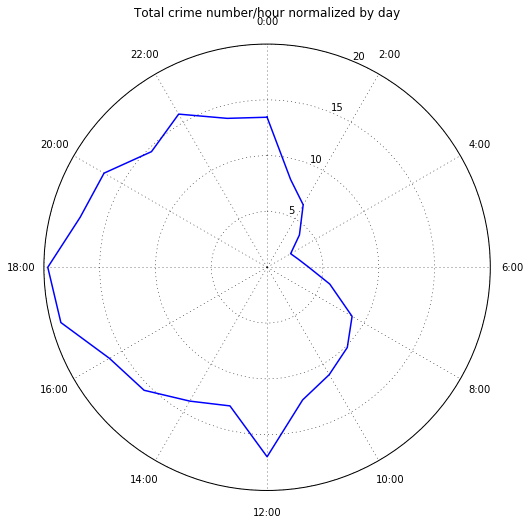

In [173]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import time
import math

%matplotlib inline

def getcategory(df, name):
    return [f for f in df.groupby(name).groups]

def mapcategory(df, name):
    for groupname in getcategory(df,name):
        df[groupname] = df[name].map(lambda x : 1 if x==groupname else 0) 

sanfrancisco = pd.read_csv('./data/sanfrancisco_incidents_summer_2014.csv')
sanfrancisco['hour'] = sanfrancisco['Time'].map(lambda x: time.strptime(x,'%H:%M').tm_hour)
sanfrancisco = sanfrancisco[sanfrancisco['Category']!='NON-CRIMINAL']
mapcategory(sanfrancisco,'Category')

def sumup(df, name, sumup):
    categories = getcategory(df, name)
    categories.append(sumup)
    onlycategory = df[categories]
    res = onlycategory.groupby(sumup).sum()
    res['total'] = res.sum(axis=1)
    return res

def plotCategoryCircularIndividual(group, title,scale=None):
    grouped = group.sort_index()
    grouped = grouped.reindex(range(0,24), fill_value = 0)
    anglevalue = Series( [math.radians(a) for a in range(0,360,15)] )
    temps_df = DataFrame({title: grouped, 'angle':anglevalue })
    df2 = pd.DataFrame([[ temps_df[title][0], math.radians(360)]], columns=[title,'angle'])
    temps_df = temps_df.append(df2, ignore_index=True) 
    sp = plt.subplot(1, 1, 1, projection='polar')
    sp.set_theta_zero_location('N')
    sp.set_theta_direction(-1)
    tick_locs = [math.radians(a) for a in range(0,360,30)]
    tick_lbls = ["{0}:00".format(f) for f in range(0,24,2)]
    if (scale is not None):
        plt.axis([0, math.radians(360), 0, scale])
    plt.xticks(tick_locs, tick_lbls)
    plt.plot(temps_df['angle'],temps_df[title], linewidth=1.5)
    
def plotCategoryCircularFromRaw(byCategory,group, normalise, scale=None):
    grouped = byCategory.get_group(group)['hour'].value_counts() / normalise
    plotCategoryCircularIndividual( grouped,group,scale)
    return grouped
    
        
def plotCategoryCircular(byCategory):
    for group in byCategory.groups:
        plotCategoryCircularFromRaw(byCategory,group)

sfbyhour = sumup(sanfrancisco,'Category','hour')
dates = pd.date_range('2014-06-01', '2014-08-31')
total_rows = dates.shape[0]

plt.clf()   
plt.figure(figsize=(8,8))
plotCategoryCircularIndividual(sfbyhour['total']/total_rows,'Total')
plt.title('Total crime number/hour normalized by day')
plt.show()  

## Temporal pattern of different crime category: important role of larceny

The next two graphics used the same methodology but display the crimes by category. 
The first graphic shows the 4 most commons crime time pattern.
The second graphics is a zoom of the first one displaying the 10th most commons crime time pattern(one can use assault, vehicle theft and warrants which are repeated as a visual clue of this zoom).

From the first graph you can observe two important facts: first, the larceny crimes are by far the most frequents in San-Francisco and second this category display a clear temporal pattern with a peak at 18:00 (9 crimes by day) which matches with the global crime time pattern.

It is also noteworthy that other crime presents diferents time pattern (for example vehicle theft show peaks at 18:00, 20:00 and 22:00, vehicle assault is broadly distributed from 12:00 to 0:00).

This shows that larceny category plays an important role in shaping temporal pattern of crime for this period.




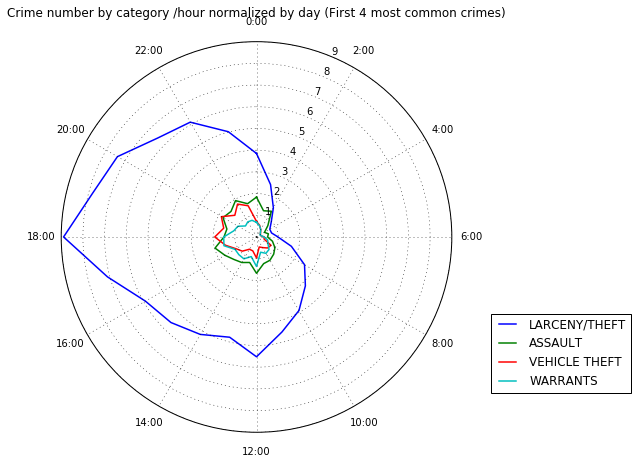

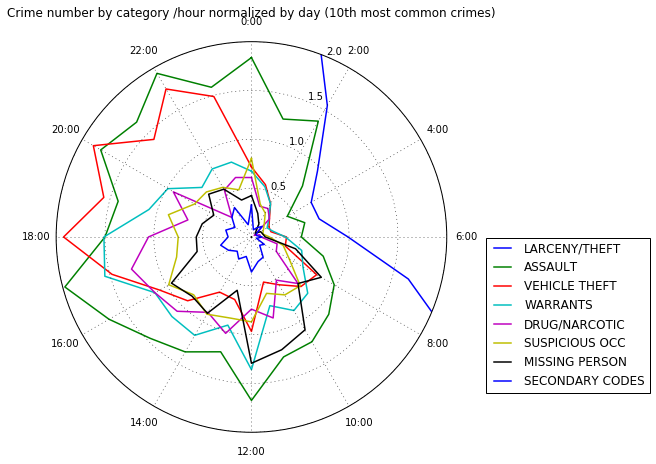

In [174]:
def Top(number, df, skip=0):
    return pd.DataFrame({'count':df.sum()}).sort_values('count',ascending=False).iloc[1+skip:number+skip+1,:]

def displayTop(number, df, byCategory, title, normalise, scale=None,skip=0):
    element = Top(number,df,skip)
    plt.clf()      
    plt.figure(figsize=(7,7))
    plt.title('Crime frequency by category seattle')
    for group in list(element.index):
        plotCategoryCircularFromRaw(byCategory, group, normalise, scale)
    plt.legend( loc=(1.1,0.1))
    plt.title(title)
    plt.show()  
    
filteredsf = sanfrancisco[sanfrancisco['Category']!='OTHER OFFENSES']
sfbyhour = sumup( filteredsf,'Category','hour')
byCategorysf = filteredsf.groupby('Category')
displayTop(4, sfbyhour, byCategorysf,'Crime number by category /hour normalized by day (First 4 most common crimes)', total_rows)
displayTop(8, sfbyhour, byCategorysf,'Crime number by category /hour normalized by day (10th most common crimes)', total_rows,2,0)